In [1]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#getting data from directory
training_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.1,shear_range=0.1,horizontal_flip=True,validation_split=0.2,rescale=(1./255))
training_data=training_data_gen.flow_from_directory('MaskDetection Dataset//Training_data',class_mode='categorical')
validation_data_gen=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.1,shear_range=0.1,horizontal_flip=True,validation_split=0.2,rescale=(1./255))
validation_data=validation_data_gen.flow_from_directory('MaskDetection Dataset//Validation_data',class_mode='categorical')


Found 673 images belonging to 2 classes.
Found 232 images belonging to 2 classes.


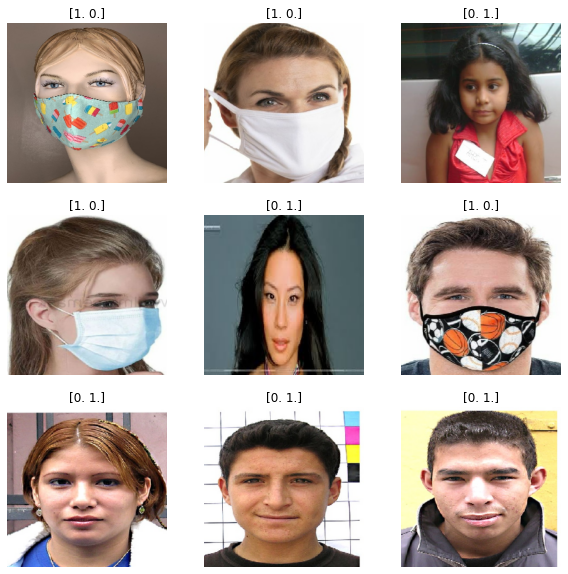

In [3]:
#visualizing the data
image,lables= training_data[0]
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1),plt.imshow(image[i]),plt.title(lables[i])
    plt.xticks([]),plt.yticks([]),plt.axis('off')
  

    
    

In [4]:
#data augmentation for training purpose
augmentation_layer=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [8]:
#creating a model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256,256,3),name='Input_layer'),
    augmentation_layer,
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu',activity_regularizer='L2'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(128,activation='relu',activity_regularizer='L2'),                        tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax)
])

In [9]:
#observing model structure
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 128)     73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 256)      

In [10]:
#training the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(training_data,epochs=10,validation_data=validation_data)

Epoch 1/10
22/22 [==============================] - 152s 7s/step - loss: 0.7721 - accuracy: 0.5379 - val_loss: 0.6935 - val_accuracy: 0.4310
Epoch 2/10
22/22 [==============================] - 163s 7s/step - loss: 0.6570 - accuracy: 0.5914 - val_loss: 0.6150 - val_accuracy: 0.4310
Epoch 3/10
22/22 [==============================] - 147s 7s/step - loss: 0.5876 - accuracy: 0.6003 - val_loss: 0.5620 - val_accuracy: 0.4310
Epoch 4/10
22/22 [==============================] - 139s 6s/step - loss: 0.5494 - accuracy: 0.7340 - val_loss: 0.5391 - val_accuracy: 0.8578
Epoch 5/10
22/22 [==============================] - 138s 6s/step - loss: 0.5969 - accuracy: 0.6612 - val_loss: 0.5656 - val_accuracy: 0.9138
Epoch 6/10
22/22 [==============================] - 125s 6s/step - loss: 0.5291 - accuracy: 0.7652 - val_loss: 0.5099 - val_accuracy: 0.8578
Epoch 7/10
22/22 [==============================] - 125s 6s/step - loss: 0.5120 - accuracy: 0.8083 - val_loss: 0.5150 - val_accuracy: 0.6164
Epoch 8/10
22

In [24]:
#Run this cell to save model
model.save('saved_model.h5')

In [27]:
#visualizing the performance of the model
accuracy=history.history['accuracy']
validation_accuracy=history.history['val_accuracy']
loss=history.history['loss']
validation_loss=history.history['val_loss']
epoch=np.arange(10)

plt.figure(figsize=(10,10))
plt.plot(epoch,accuracy)
plt.plot(epoch,validation_accuracy)
plt.plot(epoch,loss)
plt.plot(epoch,validation_loss)
plt.legend('upper_right')
plt.show()